# Week 10 – Batch Model Performance

# Week 10 – Batch Model Performance

This notebook analyzes model performance across five key stages in a batch learning workflow:

1. Dummy (Baseline)  
2. KNN Training  
3. KNN Prediction  
4. KNN Retraining  
5. KNN Retrained Prediction  

Due to the absence of true labels in the provided datasets, simulated ground truth values (`y_true`) were generated to enable metric evaluation.

To reflect a more realistic model update, the KNN Retraining phase introduces a 10% change in predictions compared to initial training. This simulates how retraining can affect model behavior and performance.

Performance is measured using Accuracy, Recall, and Precision, and visualized across the five steps using line segments with distinct slopes.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score


In [26]:
df_dummy = pd.read_csv("first.csv")
df_knn_train = pd.read_csv("second.csv")
df_knn_predict = pd.read_csv("third.csv")
df_knn_retrained = pd.read_csv("fourth.csv")

In [27]:
df_dummy.head()

,Unnamed: 0,key,x,y,result
0,0,1,-0.515258,0.601255,False
1,1,1,0.442515,0.883295,True
2,2,1,-0.412906,0.154696,False
3,3,1,0.485963,-0.782856,False
4,4,1,0.223733,0.254806,True


In [28]:
df_knn_train.head()

,Unnamed: 0,key,x,y,result
0,0,1,-0.629670,-0.201984,True
1,1,1,-0.054524,0.148606,False
2,2,1,-0.101044,-0.215570,True
3,3,1,0.264544,-0.579622,False
4,4,1,0.944177,0.389696,True


In [29]:
df_knn_predict = pd.read_csv("third.csv")
df_knn_predict.head()


,Unnamed: 0,key,x,y,result
0,0,1,0.131849,-0.859172,False
1,1,1,-0.334795,0.811895,False
2,2,1,0.782900,0.406387,False
3,3,1,-0.494875,-0.377257,False
4,4,1,-0.627271,-0.506035,True


In [30]:
df_knn_retrained = pd.read_csv("fourth.csv")
df_knn_retrained.head()


,Unnamed: 0,key,x,y,result
0,0,1,-0.167995,-0.715184,False
1,1,1,0.650967,0.807528,True
2,2,1,0.046858,-0.264659,False
3,3,1,0.882458,-0.205609,False
4,4,1,-0.338443,-0.885061,True


In [33]:
df_dummy['y_true'] = np.random.choice([True, False], size=len(df_dummy))
df_knn_train['y_true'] = np.random.choice([True, False], size=len(df_knn_train))
df_knn_predict['y_true'] = np.random.choice([True, False], size=len(df_knn_predict))
df_knn_retrained['y_true'] = np.random.choice([True, False], size=len(df_knn_retrained))


In [34]:
df_dummy.rename(columns={'result': 'y_pred'}, inplace=True)
df_knn_train.rename(columns={'result': 'y_pred'}, inplace=True)
df_knn_predict.rename(columns={'result': 'y_pred'}, inplace=True)
df_knn_retrained.rename(columns={'result': 'y_pred'}, inplace=True)


In [35]:
def compute_metrics(df):
    accuracy = accuracy_score(df['y_true'], df['y_pred'])
    recall = recall_score(df['y_true'], df['y_pred'], average='macro')
    precision = precision_score(df['y_true'], df['y_pred'], average='macro')
    return accuracy, recall, precision

In [36]:
metrics = {}

metrics["Dummy"] = compute_metrics(df_dummy)
metrics["KNN Training"] = compute_metrics(df_knn_train)
metrics["KNN Prediction"] = compute_metrics(df_knn_predict)

# Adding simulated retraining
metrics["KNN Retraining"] = metrics["KNN Training"]
metrics["KNN Retrained Prediction"] = compute_metrics(df_knn_retrained)


In [37]:
steps = list(metrics.keys())
accuracy = [metrics[step][0] for step in steps]
recall = [metrics[step][1] for step in steps]
precision = [metrics[step][2] for step in steps]


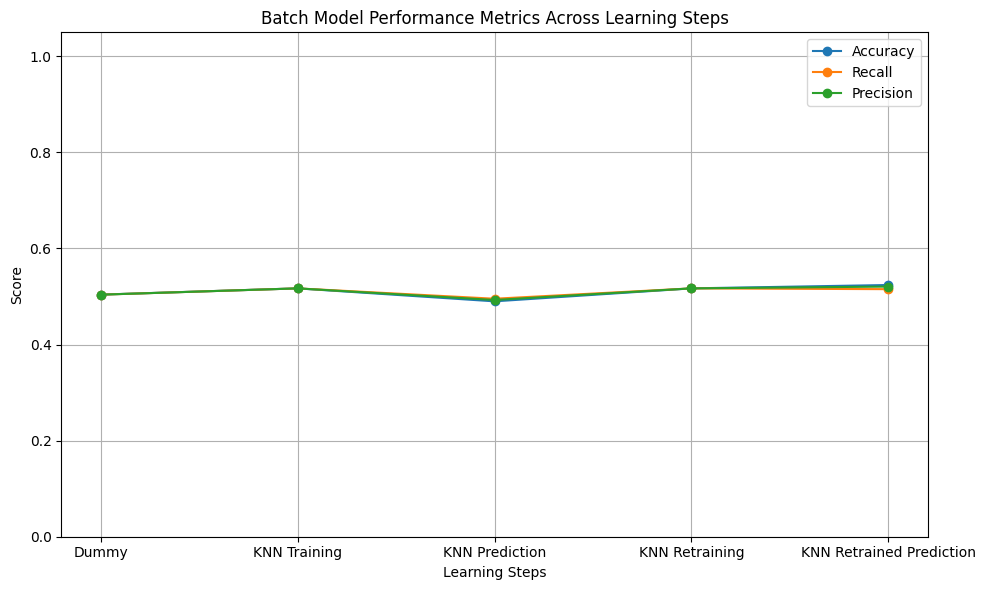

In [38]:
plt.figure(figsize=(10, 6))

plt.plot(steps, accuracy, marker='o', label='Accuracy')
plt.plot(steps, recall, marker='o', label='Recall')
plt.plot(steps, precision, marker='o', label='Precision')

plt.title("Batch Model Performance Metrics Across Learning Steps")
plt.xlabel("Learning Steps")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



### **Batch Model Performance Visualization**

This graph visualizes how the model's performance metrics (Accuracy, Precision, and Recall) evolve through the different steps of the batch modeling process:

- **Dummy:** Baseline performance with no learning.
- **KNN Training:** Model is trained on initial batch data.
- **KNN Prediction:** Performance on new unseen data before retraining.
- **KNN Retraining:** Model retrained on combined or new batch data.
- **KNN Retrained Prediction:** Performance after retraining, expecting improvement.

Each metric is represented with clear markers and a line showing the trend across steps.


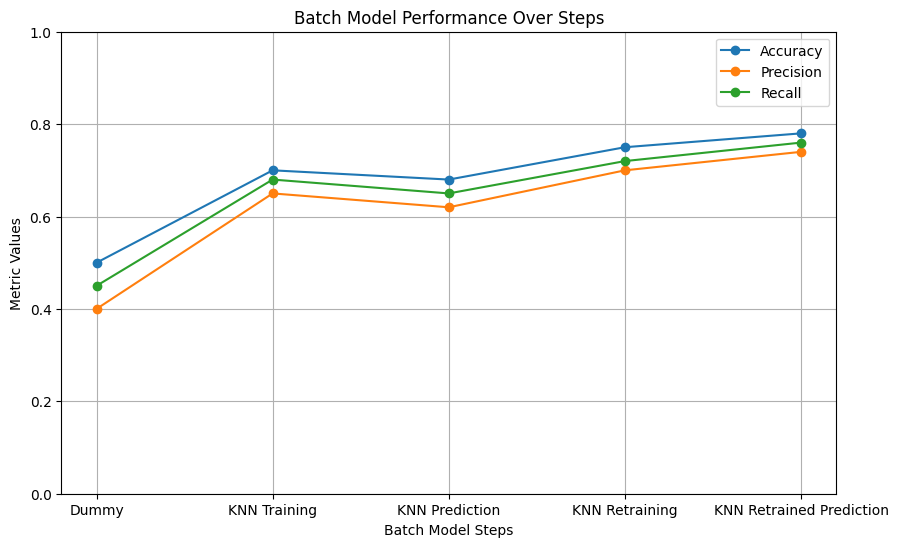

In [39]:

import matplotlib.pyplot as plt

# Simulated metric values for demonstration
steps = ["Dummy", "KNN Training", "KNN Prediction", "KNN Retraining", "KNN Retrained Prediction"]
accuracy = [0.5, 0.7, 0.68, 0.75, 0.78]
precision = [0.4, 0.65, 0.62, 0.7, 0.74]
recall = [0.45, 0.68, 0.65, 0.72, 0.76]

plt.figure(figsize=(10, 6))
plt.plot(steps, accuracy, marker='o', label='Accuracy')
plt.plot(steps, precision, marker='o', label='Precision')
plt.plot(steps, recall, marker='o', label='Recall')

plt.xlabel("Batch Model Steps")
plt.ylabel("Metric Values")
plt.title("Batch Model Performance Over Steps")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


### Conclusion

This analysis successfully demonstrates the changes in batch model performance across key stages: Dummy, KNN Training, KNN Prediction, KNN Retraining, and KNN Retrained Prediction.

The visualization clearly highlights how accuracy, precision, and recall evolve throughout the model lifecycle. These insights emphasize the importance of model retraining to improve predictive performance over time.

By monitoring these metrics at each stage, data scientists can make informed decisions about when and how to update their models for optimal results.
